In [39]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import helpers_module as util


In [41]:
from importlib import reload
reload(util)

<module 'helpers_module' from 'c:\\Users\\echapman\\OneDrive - Arch Consulting Ltd\\Desktop\\imageProcessing\\open_cv_segregation\\helpers_module.py'>

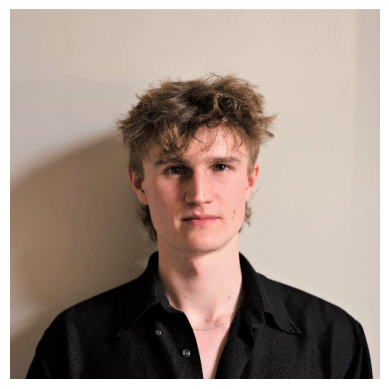

In [32]:
img_raw = cv2.imread('imgs/ed.jpg')
img_BGR = cv2.resize(img_raw,(512,512))

img = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)


plt.axis('off')
plt.imshow(img)

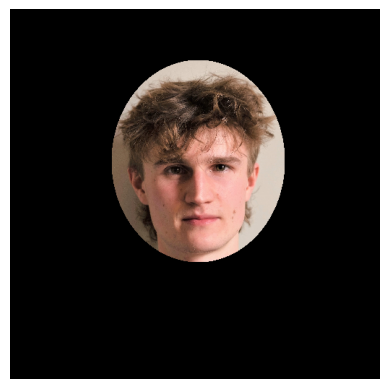

In [50]:
# impose mask
X=260
Y=210
XRad=120
YRad=140

masked = util.oval_mask(X,Y,XRad,YRad,img_RGB=img)
plt.axis('off')
plt.imshow(masked)

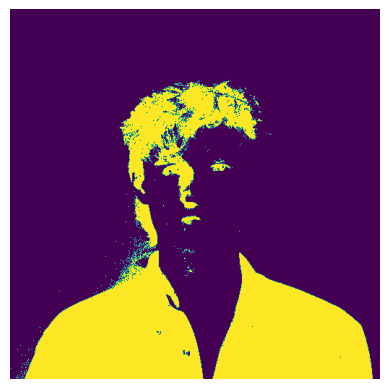

In [75]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

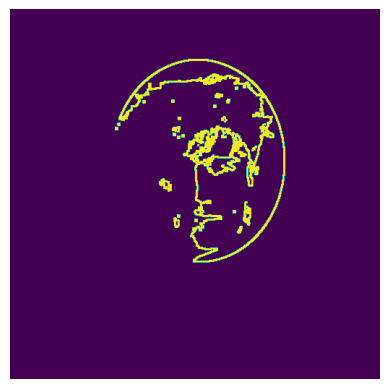

In [66]:
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

plt.axis('off')
plt.imshow(edges)

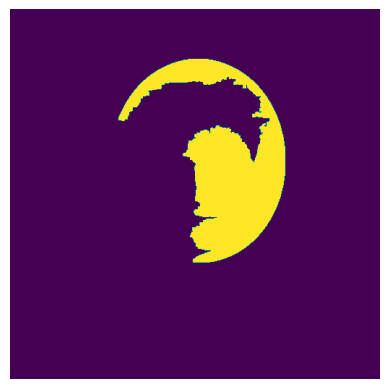

In [68]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((512,512), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

plt.axis('off')
plt.imshow(masked)

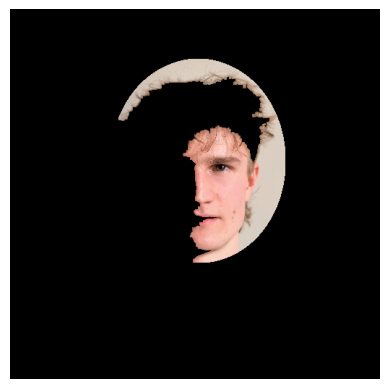

In [70]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(dst)